FLOOR 4 TO 14 with floor and sun correction
floor_num:  15 

[0.00287672 0.00287097 0.00286443 0.00285878 0.00285289 0.00284097
 0.00283438 0.00282555 0.00281442 0.0028025 ]
popt, pcov [-2.07202845e-06  2.91386502e-03] [[ 3.44583262e-17 -1.17015547e-15]
 [-1.17015547e-15  4.39700932e-14]]
slopeOne:  9463434.722194757 with error: 26810.206873530653
%difference:  48.60921360230461
sizeOne:  10

[0.00287913 0.00287479 0.00286664 0.0028616  0.00285168 0.0028463
 0.00283519 0.00282625 0.00281583 0.00280199]
slopeTwo:  9118777.049282746 with error: 24892.92092833529
%difference:  43.196875773912474
sizeTwo:  10

[0.00287933 0.00287328 0.00286674 0.00285939 0.00285278 0.00284439
 0.00283388]
slopeThree:  10365323.249903245 with error: 55290.57433546788
%difference:  62.77203595953588
sizeThree:  7

Average Radius: 9649178.34046025 51.52604177858433
Average Radius error:  22099.503049444756


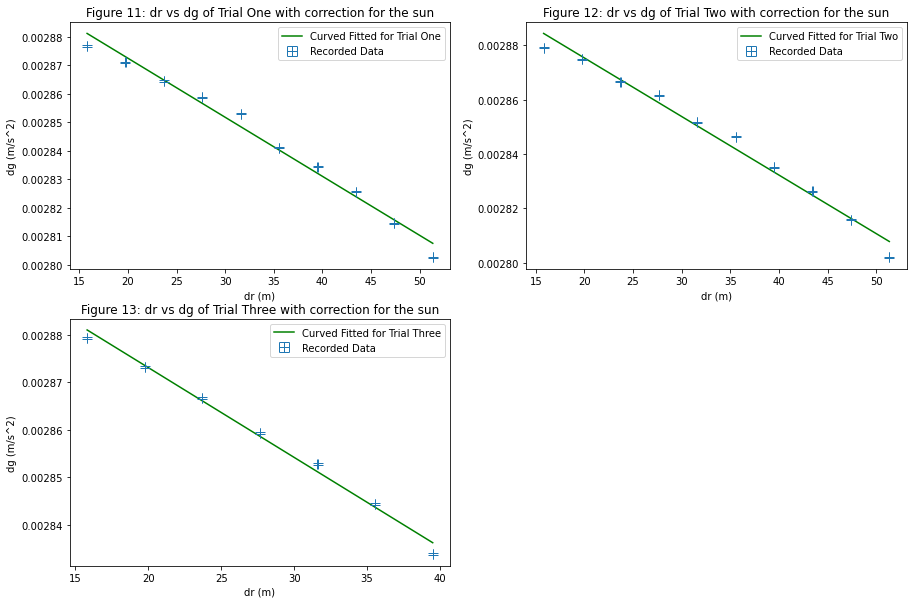

In [6]:
######### Radius of the Earth - Jason & Alex 

######### FLOOR 4 TO 14 with floor and sun correction
print('FLOOR 4 TO 14 with floor and sun correction')

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

# radius of the earth 6371,000 m, 6368,000m for toronto
def func(x, m, b):
    return m*x + b

def rec_u(a, u):
    return u / a**2

floor_num, trialOne, trialTwo, trialThree = np.loadtxt(
    'data - data.csv', 
    dtype=float, skiprows=1, delimiter=',', unpack=True)

print('floor_num: ', len(floor_num), '\n')

dg = np.zeros(len(floor_num))
dr = np.zeros(len(floor_num))
k = 0.10055
g = 9.804253
m = 2 # number of parameters in the model
expectedValue = 6368000
plt.figure(figsize=(15,10))

######################################################################
# Uncertainties
dr_msm_err = 0.01    # xerr, 0.01 measurement uncertainty
dg_msm_err =  0.2 * k / 100000     # yerr, 0.2 measurement uncertainty
# print("yerr", -(2*g*3.95)/(dg_msm_err))

######################################################################
# Trial 1
tot_u = []
corr = 0
for count in range(4, len(floor_num) - 1):
    floor = count
    reading = trialOne[count]
    corr += 6.67*10**-11 * 10**6 * \
                (1 / ((count - 2) * 3.95)**2 + 1 / ((16 - count) * 3.95)**2)
    dr[count] = floor * 3.95
    dg[count] = reading * k / 100000    # m/s^2 (mgal to m/s^2: 100000)
    dg[count] = dg[count] - corr
                
    dg[count] = dg[count] + (6.67*10**-11 * (1.989 * 10**30) / 
                             (149.6*10**9)**2) * math.cos(math.pi/18 - 
                                            (count-4) * math.pi / 180) * 0.388
   #  print('dg', count, ':   ', dg[count])
    
    # y_error
    u1 = 1 / ((count-2) * 3.95)**2 + 1 / ((16 - count) * 3.95)**2
    u2 = (2 * (count - 2) * 0.01 / ((count - 2) * 3.95)**3) ** 2 + \
            (2 * (16 - count) * 0.01 / ((16 - count) * 3.95)**3) ** 2
    ucorrection = 10**6 * 6.67 * 10**-11 * u1 * np.sqrt(0.01 + u2 / u1**2)
    tot_u.append(np.sqrt(dg_msm_err**2 + ucorrection**2))
    
dg = dg[4:-1]
dr = dr[4:-1]

print(dg)

popt, pcov = curve_fit(func, dr, dg, p0=[0, 0], sigma=tot_u, absolute_sigma=True)
print('popt, pcov', popt, pcov)
pstd = np.sqrt(np.diag(pcov))

plt.subplot(2,2,1)
plt.plot(dr, func(dr, popt[0], popt[1]), "g-", 
         label='Curved Fitted for Trial One')
plt.xlabel("dr (m)")    
plt.ylabel("dg (m/s^2)")
plt.title("Figure 11: dr vs dg of Trial One with correction for the sun")
plt.errorbar(dr, dg, xerr=dr_msm_err, yerr=tot_u, linestyle='None', 
             label="Recorded Data", elinewidth=1, capsize=5)
plt.legend()

slopeOne = (-2*g)/popt[0]
error1 = (2*g)*rec_u(popt[0], pstd[0])

print('slopeOne: ',slopeOne, 'with error:', error1)
print('%difference: ', abs(slopeOne - expectedValue)/expectedValue*100)
print('sizeOne: ', len(dg))
print('')


# ######################################################################
# # Trial 2

dg = np.zeros(len(floor_num))
dr = np.zeros(len(floor_num))
tot_u = []
corr = 0
for count in range(4, len(floor_num) - 1):
    floor = count
    reading = trialTwo[count]
    corr += 6.67*10**-11 * 10**6 * \
                (1 / ((count - 2) * 3.95)**2 + 1 / ((16 - count) * 3.95)**2)
    dr[count] = floor * 3.95
    dg[count] = reading * k / 100000    # m/s^2 (mgal to m/s^2: 100000)
    dg[count] = dg[count] - corr
    dg[count] = dg[count] + (6.67*10**-11 * (1.989 * 10**30) / 
                             (149.6*10**9)**2) * math.cos(math.pi/18 - 
                                            (count-4) * math.pi / 180) * 0.388
                                                          
    # y_error
    u1 = 1 / ((count-2) * 3.95)**2 + 1 / ((16 - count) * 3.95)**2
    u2 = (2 * (count - 2) * 0.01 / ((count - 2) * 3.95)**3) ** 2 +\
            (2 * (16 - count) * 0.01 / ((16 - count) * 3.95)**3) ** 2
    ucorrection = 10**6 * 6.67 * 10**-11 * u1 * np.sqrt(0.01 + u2 / u1**2)
    tot_u.append(np.sqrt(dg_msm_err**2 + ucorrection**2))
    
dg = dg[4:-1]
dr = dr[4:-1]

print(dg)

popt, pcov = curve_fit(func, dr, dg, p0=[0, 0], sigma=tot_u, absolute_sigma=True)
pstd = np.sqrt(np.diag(pcov))

plt.subplot(2,2,2)
plt.plot(dr, func(dr, popt[0], popt[1]), "g-", 
         label='Curved Fitted for Trial Two')
plt.xlabel("dr (m)")
plt.ylabel("dg (m/s^2)")
plt.title("Figure 12: dr vs dg of Trial Two with correction for the sun")
plt.errorbar(dr, dg, xerr=dr_msm_err, yerr=tot_u, linestyle='None', 
             label="Recorded Data", elinewidth=1, capsize=5)
plt.legend()

slopeTwo = (-2*g)/popt[0]
error2 = (2*g)*rec_u(popt[0], pstd[0])

print('slopeTwo: ',slopeTwo, 'with error:', error2)
print('%difference: ', abs(slopeTwo - expectedValue)/expectedValue*100)
print('sizeTwo: ', len(dg))
print('')


# ######################################################################
# # Trial 3

dg = np.zeros(len(floor_num))
dr = np.zeros(len(floor_num))
tot_u = []
corr = 0
for count in range(4, len(floor_num) - 1):
    floor = count
    reading = trialThree[count]
    corr +=  6.67*10**-11 * 10**6 * \
                (1 / ((count - 2) * 3.95)**2 + 1 / ((16 - count) * 3.95)**2)
    dr[count] = floor * 3.95
    dg[count] = reading * k / 100000    # m/s^2 (mgal to m/s^2: 100000)
    dg[count] = dg[count] - corr
    dg[count] = dg[count] + (6.67*10**-11 * (1.989 * 10**30) / 
                             (149.6*10**9)**2) * math.cos(math.pi/18 - 
                                            (count-4) * math.pi / 180) * 0.388
    
    # y_error
    u1 = 1 / ((count-2) * 3.95)**2 + 1 / ((16 - count) * 3.95)**2
    u2 = (2 * (count - 2) * 0.01 / ((count - 2) * 3.95)**3) ** 2 + \
            (2 * (16 - count) * 0.01 / ((16 - count) * 3.95)**3) ** 2
    ucorrection = 10**6 * 6.67 * 10**-11 * u1 * np.sqrt(0.01 + u2 / u1**2)
    tot_u.append(np.sqrt(dg_msm_err**2 + ucorrection**2))

dg = dg[4:-4]
dr = dr[4:-4]
tot_u = tot_u[:-3]

print(dg)

popt, pcov = curve_fit(func, dr, dg, p0=[0, 0], sigma=tot_u, absolute_sigma=True)
pstd = np.sqrt(np.diag(pcov))

plt.subplot(2,2,3)
plt.plot(dr, func(dr, popt[0], popt[1]), "g-", 
         label='Curved Fitted for Trial Three')
plt.xlabel("dr (m)")
plt.ylabel("dg (m/s^2)")
plt.title("Figure 13: dr vs dg of Trial Three with correction for the sun")
plt.errorbar(dr, dg, xerr=dr_msm_err, yerr=tot_u, linestyle='None', 
             label="Recorded Data", elinewidth=1, capsize=5)
plt.legend()

slopeThree = (-2*g)/popt[0]
error3 = (2*g)*rec_u(popt[0], pstd[0])

print('slopeThree: ',slopeThree, 'with error:', error3)
print('%difference: ', abs(slopeThree - expectedValue)/expectedValue*100)
print('sizeThree: ', len(dg))
print('')


# ######################################################################
print('Average Radius:',(slopeOne+slopeTwo+slopeThree)/3, 
      abs((slopeOne+slopeTwo+slopeThree)/3 - expectedValue)/expectedValue*100)

error_avg = math.sqrt(error1**2 + error2**2 + error3**2)/3
print('Average Radius error: ', error_avg)

plt.savefig("ROE_with_SUN_error.png", dpi=200, transparent=False) #PNG format

# radius of the earth 6371,000 m, 6368,000m for toronto